In [114]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [115]:
import warnings 

warnings.filterwarnings("ignore")

In [116]:
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [117]:
df.head().T

,0,1,2,3,4
Date,2008-12-01,2008-12-02,2008-12-03,2008-12-04,2008-12-05
Location,Albury,Albury,Albury,Albury,Albury
MinTemp,13.4,7.4,12.9,9.2,17.5
MaxTemp,22.9,25.1,25.7,28.0,32.3
Rainfall,0.6,0.0,0.0,0.0,1.0
Evaporation,NaN,NaN,NaN,NaN,NaN
Sunshine,NaN,NaN,NaN,NaN,NaN
WindGustDir,W,WNW,WSW,NE,W
WindGustSpeed,44.0,44.0,46.0,24.0,41.0
WindDir9am,W,NNW,W,SE,ENE


In [118]:
df.shape

(145460, 23)

In [119]:
df.columns 

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [121]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Percentage of null values in target variable (RainTomorrow)

In [122]:
print(f"{(df['RainTomorrow'].isnull().sum()/len(df)*100):.2f}%")

2.25%


Since there are less than 5% of null values in the target column let's drop all the rows containing null values in the target column

In [123]:
df = df.dropna(subset='RainTomorrow')

In [124]:
df.shape

(142193, 23)

In [125]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

In [126]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

Find all the categorical variables 

In [127]:
categorical = [var for var in df.columns if df[var].dtype=='O']

categorical

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [128]:
df[categorical].value_counts()

Date        Location    WindGustDir  WindDir9am  WindDir3pm  RainToday  RainTomorrow
2017-06-25  Wollongong  WSW          W           W           No         No              1
2007-11-01  Canberra    NW           SW          NW          No         Yes             1
2007-11-02  Canberra    ENE          E           W           Yes        Yes             1
2007-11-03  Canberra    NW           N           NNE         Yes        Yes             1
2007-11-04  Canberra    NW           WNW         W           Yes        Yes             1
                                                                                       ..
2007-11-19  Canberra    E            NNE         W           No         No              1
2007-11-18  Canberra    S            SW          NE          Yes        No              1
2007-11-17  Canberra    ESE          WSW         W           No         Yes             1
2007-11-16  Canberra    E            SE          WSW         No         No              1
2007-11-15  Can

In [129]:
df[categorical].isnull().sum()

Date                0
Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

In [130]:
df[['Date']].head()

,Date
0,2008-12-01
1,2008-12-02
2,2008-12-03
3,2008-12-04
4,2008-12-05


In [131]:
df['Date'] = pd.to_datetime(df['Date'])

In [132]:
df[['Date']].head()

,Date
0,2008-12-01
1,2008-12-02
2,2008-12-03
3,2008-12-04
4,2008-12-05


In [133]:
df['Year'] = df['Date'].dt.year

In [134]:
df['Month'] = df['Date'].dt.month

In [135]:
df['Day'] = df['Date'].dt.day

In [136]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [137]:
df.drop(labels=['Date'],inplace=True,axis=1)

In [138]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [139]:
df.Location.value_counts()

Location
Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Ballarat            3028
Launceston          3028
Albany              3016
Albury              3011
MelbourneAirport    3009
PerthAirport        3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith             2964
NorfolkIsland       2964
Newcastle           2955
SalmonGums          2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
BadgerysCreek   

In [140]:
df.Location.isnull().sum()

np.int64(0)

In [141]:
df = pd.get_dummies(data=df,columns=['Location'],drop_first=True)
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera
0,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,...,False,False,False,False,False,False,False,False,False,False
1,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,...,False,False,False,False,False,False,False,False,False,False
2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,...,False,False,False,False,False,False,False,False,False,False
3,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,...,False,False,False,False,False,False,False,False,False,False
4,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,...,False,False,False,False,False,False,False,False,False,False


In [142]:
df = df.replace({True: 1, False: 0})

df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera
0,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,...,0,0,0,0,0,0,0,0,0,0
1,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,...,0,0,0,0,0,0,0,0,0,0
2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,...,0,0,0,0,0,0,0,0,0,0
3,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,...,0,0,0,0,0,0,0,0,0,0


In [143]:
categorical

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [144]:
df.WindGustDir.isnull().sum()

np.int64(9330)

In [145]:
df.WindGustDir.value_counts()

WindGustDir
W      9780
SE     9309
E      9071
N      9033
SSE    8993
S      8949
WSW    8901
SW     8797
SSW    8610
WNW    8066
NW     8003
ENE    7992
ESE    7305
NE     7060
NNW    6561
NNE    6433
Name: count, dtype: int64

In [146]:
df.WindGustDir.unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', nan, 'E', 'SSW'], dtype=object)

In [147]:
df['WindGustDir'].mode()

0    W
Name: WindGustDir, dtype: object

In [148]:
## Fill the missing values in this column by the mode 
df['WindGustDir'].fillna(df['WindGustDir'].mode()[0],inplace=True)

In [149]:
df['WindGustDir'].isnull().sum()

np.int64(0)

In [150]:
df['WindDir9am'].isnull().sum()

np.int64(10013)

In [151]:
df['WindDir9am'].value_counts()

WindDir9am
N      11393
SE      9162
E       9024
SSE     8966
NW      8552
S       8493
W       8260
SW      8237
NNE     7948
NNW     7840
ENE     7735
ESE     7558
NE      7527
SSW     7448
WNW     7194
WSW     6843
Name: count, dtype: int64

In [152]:
df['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [153]:
df['WindDir9am'].fillna(df['WindDir9am'].mode()[0],inplace=True)

In [154]:
df['WindDir9am'].isnull().sum()

np.int64(0)

In [155]:
df['WindDir3pm'].isnull().sum()

np.int64(3778)

In [156]:
df['WindDir3pm'].value_counts()

WindDir3pm
SE     10663
W       9911
S       9598
WSW     9329
SW      9182
SSE     9142
N       8667
WNW     8656
NW      8468
ESE     8382
E       8342
NE      8164
SSW     8010
NNW     7733
ENE     7724
NNE     6444
Name: count, dtype: int64

In [157]:
df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0],inplace=True)

In [158]:
df['WindDir3pm'].isnull().sum()

np.int64(0)

In [159]:
df['RainToday'].head()

0    No
1    No
2    No
3    No
4    No
Name: RainToday, dtype: object

In [160]:
df['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [161]:
df['RainToday'].value_counts()

RainToday
No     109332
Yes     31455
Name: count, dtype: int64

In [162]:
df['RainToday'].isnull().sum()

np.int64(1406)

Fill all the null values in **RainToday** with mode of the column 

In [163]:
df['RainToday'].fillna(df['RainToday'].mode()[0],inplace=True)

In [165]:
categorical = [col for col in categorical if col not in ['Date', 'Location']]
df[categorical].isnull().sum()



WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [166]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera
0,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,...,0,0,0,0,0,0,0,0,0,0
1,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,...,0,0,0,0,0,0,0,0,0,0
2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,...,0,0,0,0,0,0,0,0,0,0
3,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,...,0,0,0,0,0,0,0,0,0,0


Now the all the null values in all the categorical columns are removed.

In [167]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Year', 'Month', 'Day',
       'Location_Albany', 'Location_Albury', 'Location_AliceSprings',
       'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo',
       'Location_Brisbane', 'Location_Cairns', 'Location_Canberra',
       'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor',
       'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart',
       'Location_Katherine', 'Location_Launceston', 'Location_Melbourne',
       'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree',
       'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle',
       'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland',
     

In [169]:
numerical = [var for var in df.columns if df[var].dtype!='O' and var.startswith('Location')==False]

numerical 

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

In [171]:
df[numerical].isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
Year                 0
Month                0
Day                  0
dtype: int64

In [172]:
print(round(df[numerical].describe()),2)

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  141556.0  141871.0  140787.0      81350.0   74377.0       132923.0   
mean       12.0      23.0       2.0          5.0       8.0           40.0   
std         6.0       7.0       8.0          4.0       4.0           14.0   
min        -8.0      -5.0       0.0          0.0       0.0            6.0   
25%         8.0      18.0       0.0          3.0       5.0           31.0   
50%        12.0      23.0       0.0          5.0       8.0           39.0   
75%        17.0      28.0       1.0          7.0      11.0           48.0   
max        34.0      48.0     371.0        145.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      140845.0      139563.0     140419.0     138583.0     128179.0   
mean           14.0          19.0         69.0         51.0       1018.0   
std             9.0           9.0         19.0         21.0          7.0   
mi

By looking at this we can understand there are some outliers present in `Rainfall` , `Evaporation` , `WindSpeed9am` and `WindSpeed3pm`

I will draw boxplots to visualize the outliers 

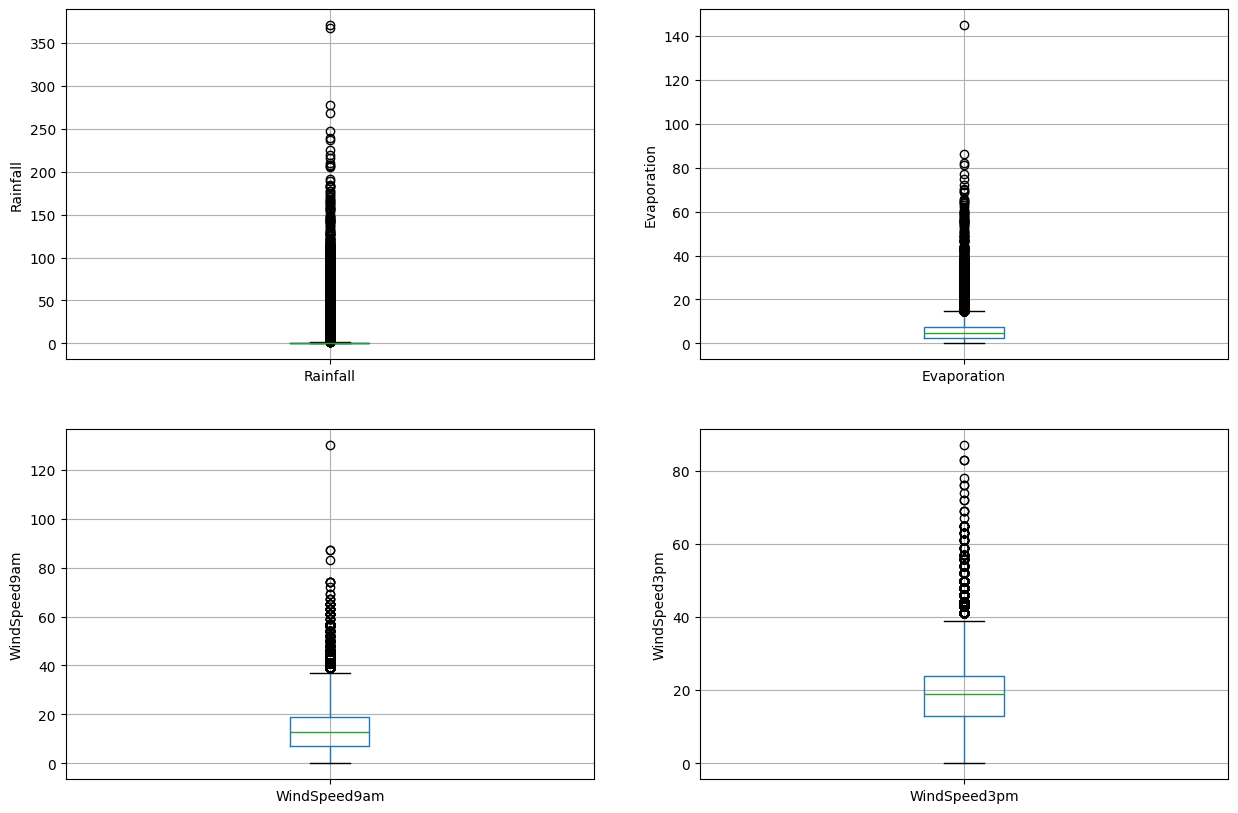

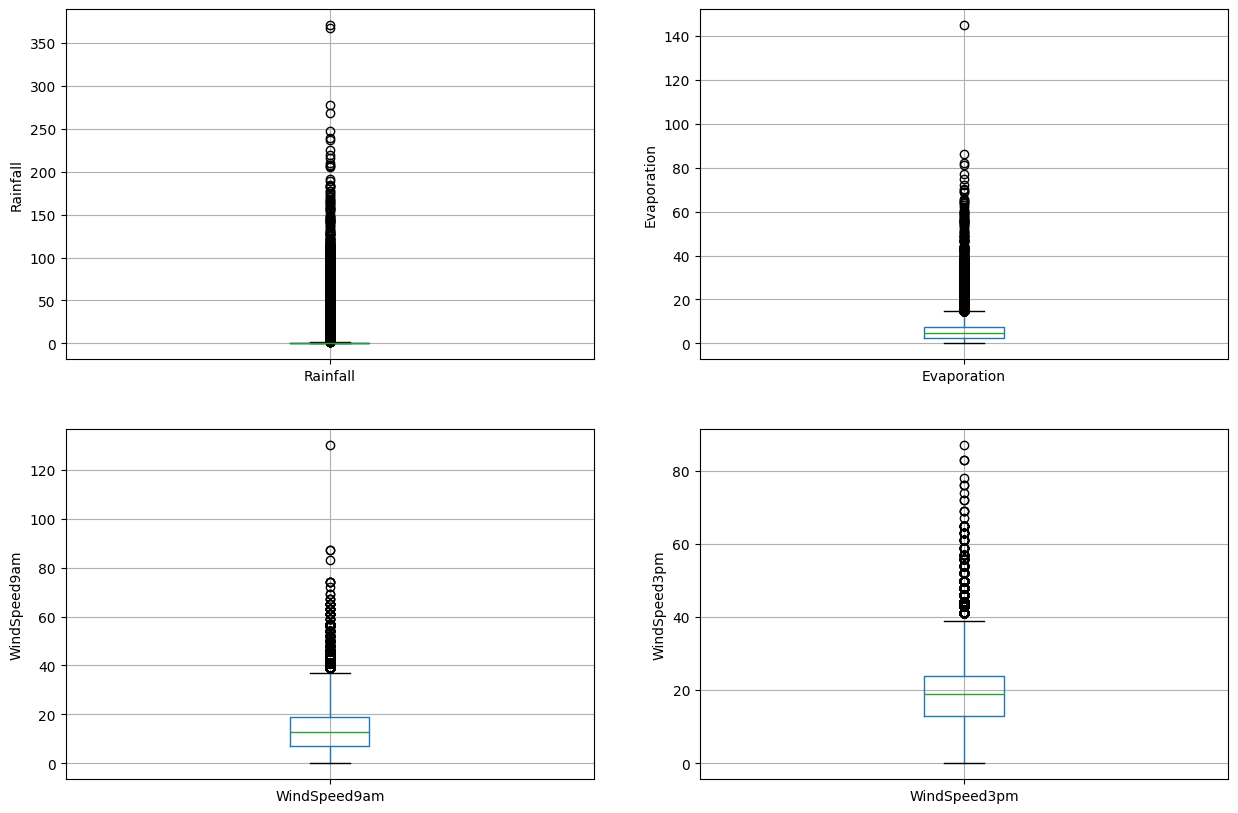

In [180]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

plt.show()

There are outliers present in the above variables 

Now i am checking whether these outliers specifically affect the target 

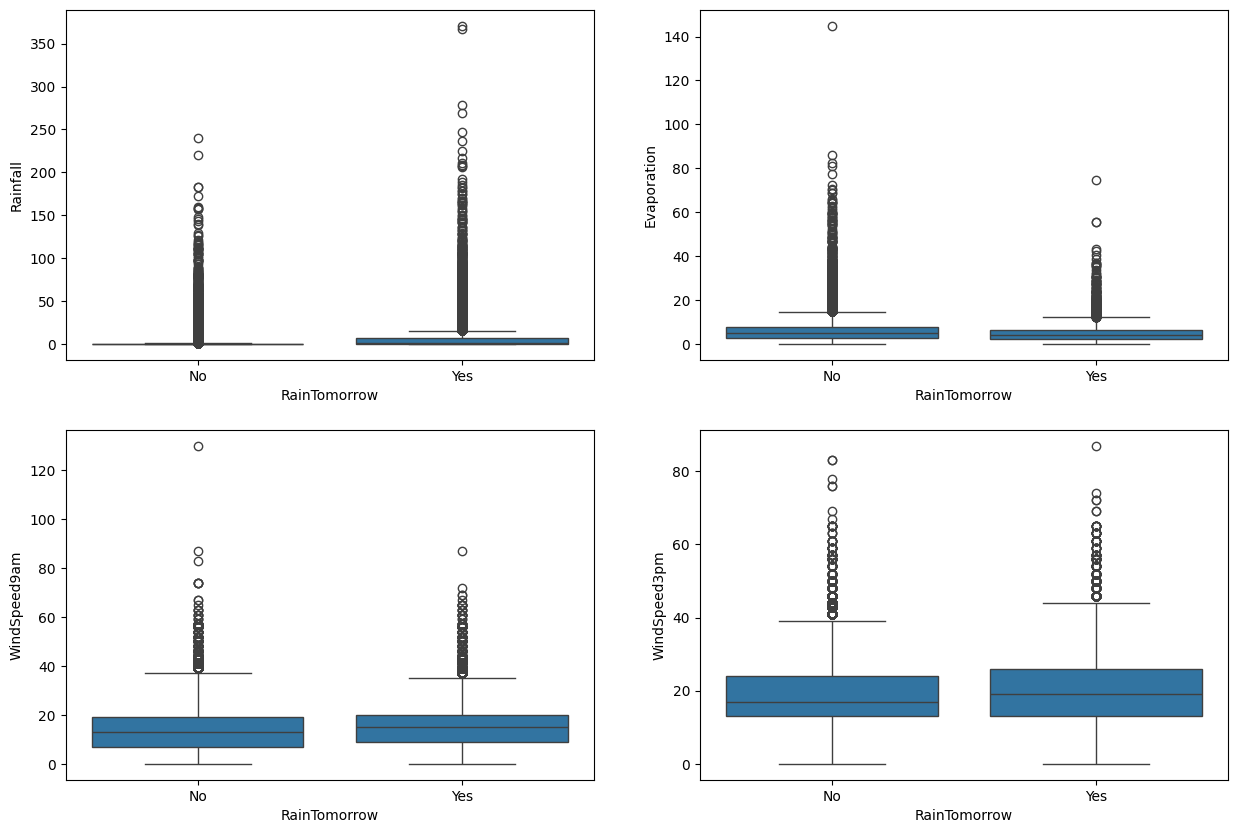

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
sns.boxplot(x='RainTomorrow', y='Rainfall', data=df)
plt.ylabel('Rainfall')

plt.subplot(2, 2, 2)
sns.boxplot(x='RainTomorrow', y='Evaporation', data=df)
plt.ylabel('Evaporation')

plt.subplot(2, 2, 3)
sns.boxplot(x='RainTomorrow', y='WindSpeed9am', data=df)
plt.ylabel('WindSpeed9am')

plt.subplot(2, 2, 4)
sns.boxplot(x='RainTomorrow', y='WindSpeed3pm', data=df)
plt.ylabel('WindSpeed3pm')

plt.show()


We can see that outliers arenot biased towards one category in the target variable 

In [186]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera
0,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,...,0,0,0,0,0,0,0,0,0,0
1,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,...,0,0,0,0,0,0,0,0,0,0
2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,...,0,0,0,0,0,0,0,0,0,0
3,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,...,0,0,0,0,0,0,0,0,0,0


In [187]:
for var in numerical:
    print(df[var].value_counts())

MinTemp
 9.6     883
 11.0    883
 10.2    880
 10.5    867
 10.8    860
        ... 
-7.1       1
 31.2      1
 30.3      1
 31.0      1
 30.2      1
Name: count, Length: 389, dtype: int64
MaxTemp
 20.0    871
 19.8    829
 19.0    827
 20.4    820
 20.8    804
        ... 
 46.5      1
-2.4       1
 45.6      1
 46.2      1
 48.1      1
Name: count, Length: 505, dtype: int64
Rainfall
0.0      90275
0.2       8685
0.4       3750
0.6       2562
0.8       2028
         ...  
87.8         1
70.4         1
174.6        1
164.6        1
141.2        1
Name: count, Length: 679, dtype: int64
Evaporation
4.0     3282
8.0     2574
2.2     2057
2.0     1996
2.6     1975
        ... 
55.0       1
51.0       1
50.2       1
42.8       1
39.6       1
Name: count, Length: 356, dtype: int64
Sunshine
0.0     2308
10.7    1087
11.0    1078
10.8    1058
10.5    1018
        ... 
14.0      15
14.1       6
14.3       4
14.2       2
14.5       1
Name: count, Length: 145, dtype: int64
WindGustSpeed
35.0    

Fill all the nan values in numerical columns with its median 

In [188]:
df[numerical].isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
Year                 0
Month                0
Day                  0
dtype: int64

In [189]:
for var in numerical:
    df[var].fillna(df[var].median(),inplace=True)

In [190]:
df[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [191]:
categorical = [var for var in df.columns if df[var].dtype=='O']

categorical

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

In [192]:
df[categorical].isnull().sum()

WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [193]:
df.isnull().sum()

MinTemp                 0
MaxTemp                 0
Rainfall                0
Evaporation             0
Sunshine                0
                       ..
Location_Watsonia       0
Location_Williamtown    0
Location_Witchcliffe    0
Location_Wollongong     0
Location_Woomera        0
Length: 72, dtype: int64

Now we have removed all the null values 

In [194]:
df['RainTomorrow'].head()

0    No
1    No
2    No
3    No
4    No
Name: RainTomorrow, dtype: object

In [195]:
df['RainToday'].head()

0    No
1    No
2    No
3    No
4    No
Name: RainToday, dtype: object

In [196]:
df['RainToday'].unique()

array(['No', 'Yes'], dtype=object)

In [197]:
df['RainToday'] = df['RainToday'].map({'No':0,'Yes':1})

In [198]:
df['RainTomorrow'] = df['RainTomorrow'].map({'No':0,'Yes':1})

In [199]:
categorical = [var for var in df.columns if df[var].dtype=='O']

categorical

['WindGustDir', 'WindDir9am', 'WindDir3pm']

In [200]:
df = pd.get_dummies(df, columns=categorical, drop_first=True)

In [201]:
categorical = [var for var in df.columns if df[var].dtype=='O']

categorical

[]

In [202]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'WindDir3pm_NNW', 'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE',
       'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W',
       'WindDir3pm_WNW', 'WindDir3pm_WSW'],
      dtype='object', length=114)

Now we have converted all the categorical variables to numeric and removed all the null values 

In [204]:
X = df.drop(columns=['RainTomorrow'])   # All features except target
y = df['RainTomorrow']                  # Only target column


In [205]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [206]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [207]:
X_train_scaled = scaler.fit_transform(X_train)

In [208]:
X_test_scaled = scaler.transform(X_test)

In [209]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [210]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [211]:
y_pred = model.predict(X_test_scaled)

In [212]:
score = accuracy_score(y_test,y_pred)
print(score)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.8451714534867366
[[25986  1538]
 [ 3966  4059]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     27524
           1       0.73      0.51      0.60      8025

    accuracy                           0.85     35549
   macro avg       0.80      0.72      0.75     35549
weighted avg       0.84      0.85      0.83     35549



This was a simple project on Logistic Regression. The model shows no signs of overfitting.

By using better models we can have a better accuracy score 